<div align="right"><sub>Data Science and Machine Intelligence, Semester 1, 2019</sub>
</div>


# Assignment 2
Due Date: Friday, June 14th, 5pm.

Value: 25% of course mark

Every numbered task is worth 1 mark.

---

### Learning outcomes
- <font size="1">Analyse the principles, advantages, limitations and possible applications of machine learning</font>
- <font size="1">Generate solutions to solve machine learning problems and design and implement test procedures in order to evaluate the model.</font>
- <font size="1">Adapt mathematical intuition from Linear Algebra, Probability and Statistics to machine intelligence</font>
- <font size="1">Apply data mining techniques to fetch, scrub, explore, visualize, model, evaluate, and interpret data</font>

### TensorFlow

The following code implements linear regression using TensorFlow. It has two lines of code missing that you are supposed to implement yourself:

- 1) Create a variable `y_pred` that implements $y_{pred}=XW+b$ and another variable `cost` (the cost function) that implements the linear regression cost function $cost = \frac{1}{2m} \sum{(y_{pred}-Y)^2}$ (Hint: The tensor flow operator `tf.reduce_sum` could be helpful to carry out the summation in the formula)

In [ ]:
%matplotlib inline
'''
linear regression using TensorFlow.
'''
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear regression model by creating a prediction y_pred for an input X----------------------------------

# Your code goes here

#---------------------------------------------------------------------------------------------------------------------

# Calculate the cost function of linear regression-------------------------------------------------------------------- 

# Your code goes here

#---------------------------------------------------------------------------------------------------------------------

# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

## Sentiment analysis

- 2) Load the sentiment classifier model you created in the `2 Classifying movie reviews.ipynb` practical of Lecture 18 

- 3) Predict the sentiment of the following sentences:

```
test_sentence = "Terminator 2 was the most amazing movie I have ever seen"
test_sentence = "My girlfriend dragged me to watch Titanic and it was painful to watch that piece of crap all the way to the end "
test_sentence = "Donald Trump is the best president the working-class people ever had"
test_sentence = "Donald Trump is a disgrace for the country and the world"

```

## Multi-class classification using Keras

Build a neural network to classify a data set of Reuters newswires (news headlines) into 46 different mutually-exclusive topics. Since we have many classes, this problem is an instance of "multi-class classification".

We will be working with the Reuters dataset, a set of short newswires and their corresponding topics, published by Reuters in 1986. There are 46 different topics; some topics are more represented than others, but each topic has at least 10 examples in the training set.

The argument `num_words=10000` restricts the vocabulary to the 10,000 most frequently occurring words found in the data

In [ ]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Each example is a list of integers (word indices). Recalled this is just a sentence where each word is represented by an id:

In [ ]:
print(train_data[10])

Here's how you can decode it back to words, in case you are curious:

In [ ]:
def decodeIndexesToWords(sentence):

    word_index = reuters.get_word_index()
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    # Note that our indices were offset by 3
    # because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
    decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in sentence])
    return decoded_newswire

decoded_newswire = decodeIndexesToWords(train_data[0])

In [ ]:
decoded_newswire

we need to vectorize the data and the labels and split it into training, validation and test sets.

In [ ]:
import numpy as np
from keras.utils.np_utils import to_categorical

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data[1000:])
x_val = vectorize_sequences(train_data[:1000])
x_test = vectorize_sequences(test_data)

y_train = to_categorical(train_labels[1000:])
y_val = to_categorical(train_labels[:1000])
y_test = to_categorical(test_labels)

your task:

- 4) build a Keras sequential model with three dense layers. The first and second layers should have 64 units and a relu activation function. The third layer should have 46 units and its activation function should be softmax. You should use the `Adam` optimizer and `categorical_crossentropy` as loss function. Train the network for 20 epochs

- 5) display the accuracy curve of your network on the training and validation sets 

- 6) around what epoch does the network start to overfit?

In [ ]:
#Textual answer is enough

- 7) retrain the network with the optimal number of epochs

- 8) evaluate the performance of the network on the test set

# Computer vision and Image Classification

- 9) Use the ResNet50 Convolutional neural network model (pretrained on the ImageNet Challenge data set) to classify the following image:
![](./images/church.jpg). 

# Transfer learning

In this exercise, you are required to use transfer learning, which means starting with a model that has already been trained on another but similar problem and retraining the last layers of the model on a specific problem set we are interested in. Creating a top-performing Deep learning model from scratch requires a huge training set of images and can take days in clusters of GPUs, but transfer learning can be done in short order.

We are going to use the Inception v3 network. Inception v3 is trained for the ImageNet Large Visual Recognition Challenge and it can differentiate between 1,000 different classes of objects on images, like dogs or dishwashers. We will use this same network, but retrain its top layers to tell apart a small number of classes (6) based on our own examples. Use the following data set for the retraining:

`I:\COURSES\ITP\BITY3\IN726-dsmi-data\dsmi_machine_vision_challenge.rar`

`dsmi_machine_vision_challenge.rar` is a small data set with a few hundred images belonging to just 6 categories: electric guitar, elephant, human faces, helicopter, motorbikes and the ying-yang symbol. I have already arranged the data set into a training, a validation and a test set. Your task is to create a computer vision model specialized in discriminating between this 5 categories of images.

- 10) Retrain the  `InceptionV3` network model using transfer learning in Keras. As noted in class, Inception is a huge image classification model with millions of parameters that can differentiate a large number of kinds of images. You are only required to train the final layer of that network for our specific problems set, so training will end in a reasonable amount of time. You will need to do some research about the number of units you need in the last layer and the type of activation to use. You will also need to tinker with the kind of loss function that you want to use. You should also split the data into proper training, validation and test sets. You should get around 90% classification accuracy on the test set. We could get much higher accuracy if we would use more training data, but a few hundred images as provided in the linked data set should suffice for getting around 90% classification accuracy.

- 11) modify the code from the previous exercise so you can use TensorBoard to provide me with an image of you tensorflow graph model and a plot of the training accuracy. You need to do research on your own to learn how to use TensorFlow's TensorBoard.

You can use the following markdown syntax to inject your Figures in the notebook, just remove the preceding and ending quotes and change the names of the files to the appropriate names.

`![](./images/yourTensorBoardGraphFile.png)`

`![](./images/yourTensorTrainingAccuracy.png)`

# Object Tracking

- 12) This exercise tests your resourcefulness and ability to carry out research on your own. Study what is a Haar Cascade classifier and how they are used in machine vision. Then, inspect Practical 2 from the transfer learning lecture  that tracks a face on a live video stream coming from a WebCam. Modify the code (you only need to modify a single line) so it accurately tracks a wall clock if it appears anywhere on the image. I will use the following image to test your application, so make sure your application works well with it.

<img src="./images/wallclock.jpg" width="100" height="100" />

Do not compute a Haar Cascade yourself for a clock (it would take a very long time on a normal computer!). Use an existing one that you can find on the web. 

# Word embeddings

- 13) Train a word2vec model on a small sample of text I gathered from Princeton University at `I:\COURSES\EAD\AITEIT3\BITY3\IN726-dsmi-data\princeton.csv`. Use word embeddings of 100 dimensions, window size of 10 and only incorporate words in the model vocabulary that occur at least 10 times in the corpus. 

- 14) Print the vector/word embedding for the word `king`:

- 15) What are the top 10 most similar words to the word `bike`? 

- 16) What is the cosine similarity between the words `programmer` and `developer`? 

- 17) What are the closest vectors to the result of adding the vectors for `poison` and `animal`?

- 18) Use your model to guess an answer to the following analogy: `Madrid is to Spain as Paris is to...`

- 19) Plot your word embeddings after applying t-SNE dimensionality reduction for the following words:
```
biology, chemistry, history, literature, lecturer, professor, undergraduates, students, swimming, running, rowing
```

# Recurrent Neural Networks

The signal `seriesSum` in red below is composed of a high frequency component (`series1` in blue) and a low frequency component (`series2` in green) 

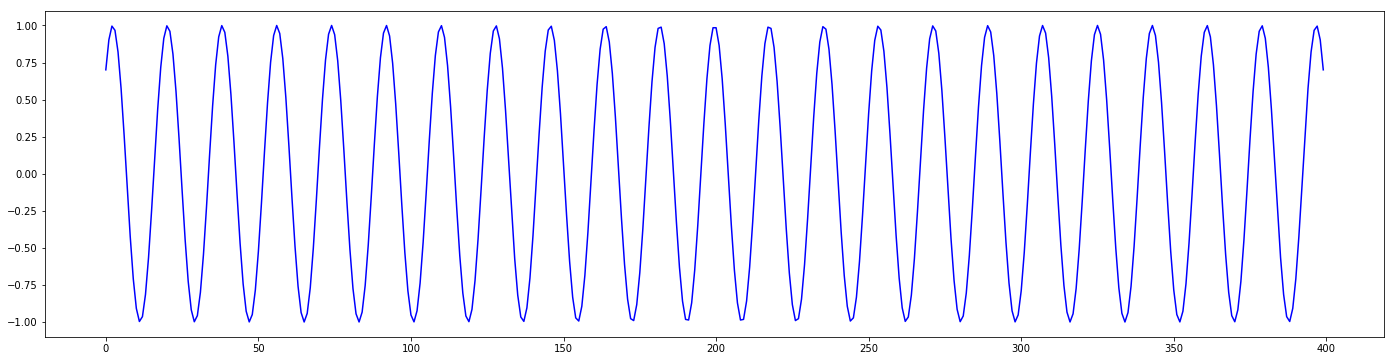

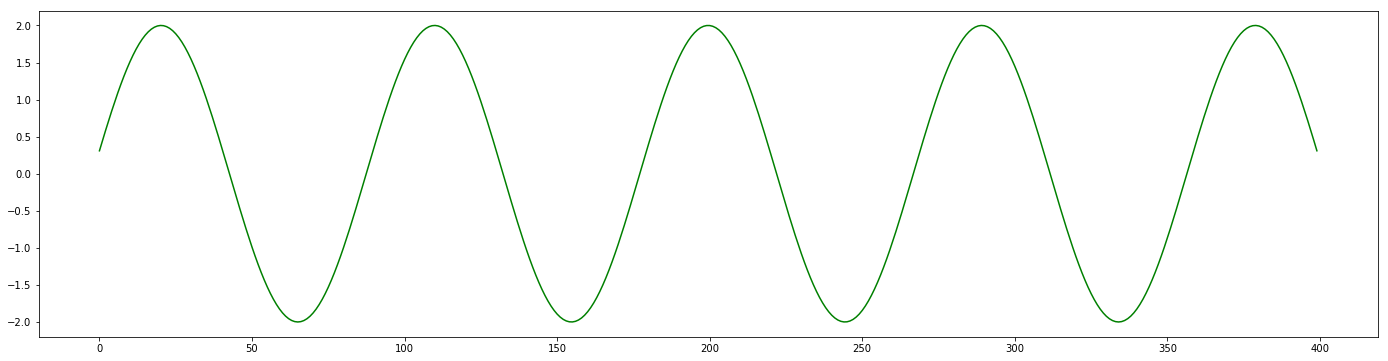

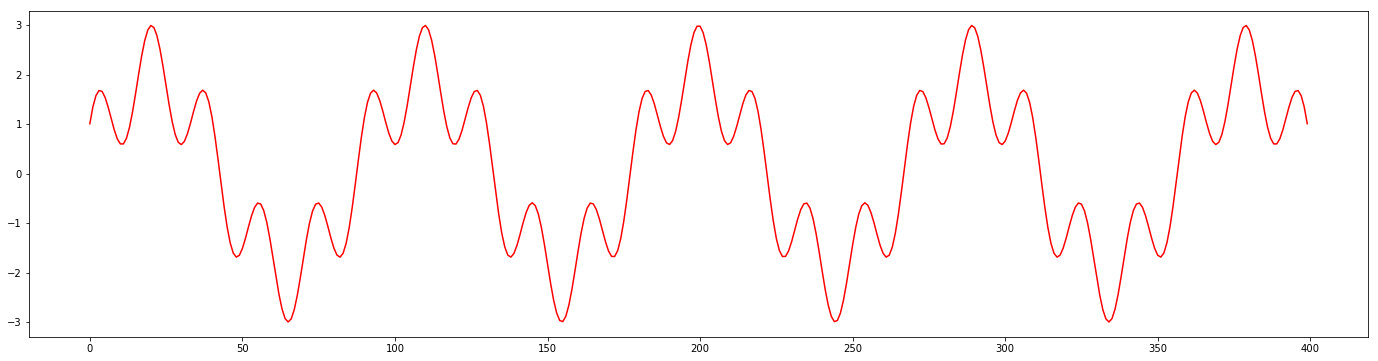

In [3]:
#for n in range(1,5):
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 
import numpy
x = numpy.linspace(-5,5,num=400)
series1 = numpy.cos(1e4/2*x)
series2 = 2*numpy.cos(1e4/10*x)
seriesSum=series1+series2
plt.rcParams["figure.figsize"] = [24,6]
plt.plot(series1,c='b')
figure()
plt.plot(series2,c='g')
figure()
plt.plot(seriesSum,c='r')

- 20) Create the appropriate type of neural network that using two thirds of the time series for training is able to predict the rest of the time series. Plot the predictions on both the training and the test data.

## Neural style transfer

- 21) Select two images of your own choosing: a target and a style. Apply the style to your target using the VGG19 computer vision model.

# Using IBM Watson web services (AI over API):

Create a script that:

- 22) Detects the language in the following string of text

> Parlare è facile. Mostrami il codice

- 23) Translates the sentence to English
- 24) Synthesizes the resulting translation into a male voice in English and writes that to a wav file.

## Reinforcement Learning

- 25) **(Hard)** OpenAI Gym has an environment called `BipedalWalker-v2`. https://github.com/openai/gym/wiki/BipedalWalker-v2 
Create that environment and make the creature learn to walk using reinforcement learning.

![](./images/bipedal.png)

# Deliverables

- 26) Hand in a single python notebook file (.ipynb) and the images from the TensorBoard exercise. Do not include any data sets in your GitHub repository!!! Use separate code cells to organize your code. Name your Python notebook according to the following pattern: `yourLastName_DSMI_A2.ipynb`. Create your own private repository for you to work on the Assignment by using the following link: 
[https://classroom.github.com/a/Yj8lldKe](https://classroom.github.com/a/Yj8lldKe)
The notebook file should be available in your own private GitHub repository “https://github.com/OPClasses2/assignment2-YourGithubUserName” and I will be able to fetch it from there. 
---